<a href="https://colab.research.google.com/github/NIETOCAMBRON7/Simulacion-2/blob/main/Exmen/Ejercicio2_Ex%C3%A1men.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alumno: Nieto Cambrón Daniel Alejandro
## Boleta: 2015030917
## Fecha: 07 de mayo de 2023
### Primer Examen parcial: Simulación 1

# <font color='blue'>Ejercicio 2</font>

Un quiosquero vende periódicos a 1.10 euros cada uno. Cada periódico le cuesta al quiosquero 0.90 euros. Las ventas de periódicos del quiosquero a partir de su experiencia se refleja en la tabla siguiente.

|Periodicos |30 |40 |50 |60 |70 |
|-----------|---|---|---|---|---|
| f(x)      |20%|25%|25%|20%|10%|

La tabla recoge por ejemplo que el 20 % del tiempo las ventas han sido de 30 periódicos. Teniendo en cuenta el coste de 0,20 euros por venta perdida y el coste de 0,10 euros por el reciclaje de cada periódico no vendido, determine el beneficio promedio diario si pide 50 periódicos cada día.

### a) Resolver por simulación y b) Resolver analiticamente

#### Paso 1. Identifique las variables

Primero que nada, definiremos nuestras variables como sigue la siguiente tabla:

|Periodicos                  |   30   |     40    |     50    |    60   |  70  |
|----------------------------|--------|-----------|-----------|---------|------|
| f(x)                       |  20%   |   25%     |   25%     |   20%   |  10% |
| $\mathcal{f} (\mathcal{x})$|  0.20  |   0.25    |   0.25    |   0.20  |  0.10|
| $\mathcal{F} (\mathcal{x})$|0 - 0.19|0.20 - 0.44|0.45 - 0.69|0.70 - 0.89|0.90 - 1.00|

A partir de esto definimos nuestra función: **num_periodicos_vendidos()**: la cual nos ayudara a definir aleatoriamente cuantos periodicos se venden al dia, simulando asi la venta diaria.


#### 2 y 3. Determine la distribución de probabilidad y modele las variables aleatorias

Este ejemplo utiliza una distribución de probabilidad discreta que se define a través de los porcentajes de ventas para cada cantidad de periódicos vendidos. La probabilidad de que se vendan 30 periódicos es del 20%, la probabilidad de que se vendan 40 periódicos es del 25%, la probabilidad de que se vendan 50 periódicos es del 25%, la probabilidad de que se vendan 60 periódicos es del 20%, y la probabilidad de que se vendan 70 periódicos es del 10%.

Estos porcentajes representan la probabilidad de ocurrencia de cada cantidad de ventas y se utilizan para generar un número aleatorio que simula el número de periódicos vendidos en un día determinado. Cada número aleatorio generado caerá en uno de los cinco rangos que representan las cantidades de ventas posibles y determina el número de periódicos vendidos para ese día en particular. Por lo tanto, la distribución de probabilidad que sigue este ejemplo es una distribución de probabilidad discreta.

In [2]:
import random
def num_periodicos_vendidos():
    num_aleatorio = random.random()
    if num_aleatorio <= 0.20:
        return 30,num_aleatorio
    elif num_aleatorio <= 0.45:
        return 40,num_aleatorio
    elif num_aleatorio <= 0.70:
        return 50,num_aleatorio
    elif num_aleatorio <= 0.90:
        return 60,num_aleatorio
    else:
        return 70,num_aleatorio

Bien, una vez definido lo anterior tenemos lo que sigue:
crearemos la función **calcular_beneficio_diario(pedido,Dias_a_simular,Imprimir)**, a la cual le mandaremos 3 argumentos, siendo:

 **pedido**: Numero de periodicos que se encargan dia con dia, en este caso el problema nos hace definirlo en 50.

**Dias_a_simular**: Sera la cantidad de días que deseamos simular la venta, en este caso, simularemos las ventas de un año

**Imprimir**: Se mandara un 1 si deseamos visualizar los resultados de la tabla tales como: numero de Día, El numero aleatorio que se genero en la funcion pasada, el numero de ventas simuladas, las ventas reales, las ventas pedidas, los periodicos no vendidos, así como tambien el beneficio diario y el promedio.
Y se mandara cualquier otro numero si no deseamos imprimir nada. Nos es muy util esta ultima ya que al momento de realizar el paso siguiente en el que tengamos que repetir la simulacion $n$ veces, pues unicamente nos interesara visualizar el factor promedio. 

In [3]:
def calcular_beneficio_diario(pedido,Dias_a_simular,Imprimir):
    Beneficios_diarios = []
    ventas_reales = 0
    ventas_perdidas = 0
    periodicos_no_vendidos = 0
    for i in range(1, Dias_a_simular +1 ):
        [num_ventas,aleatorio] = num_periodicos_vendidos()
        if num_ventas > pedido:
            ventas_reales = pedido
            ventas_perdidas = num_ventas - pedido
            periodicos_no_vendidos = 0
        else:
            ventas_reales = num_ventas
            ventas_perdidas = 0
            periodicos_no_vendidos = pedido - num_ventas
        beneficio_diario = ventas_reales * 1.10 - pedido*0.90 - ventas_perdidas * 0.20 - periodicos_no_vendidos * 0.10
        Beneficios_diarios.append(beneficio_diario)
        if Imprimir == 1:
          print("Dia:", i, "   Num. Aleatorio:", round(aleatorio, 2), "   Ventas Simuladas:", num_ventas,
                "   Ventas Reales:", ventas_reales, "   Ventas Perdidas:", ventas_perdidas,
                "   Periodicos No Vendidos:", periodicos_no_vendidos, "   Beneficio Diario:", round(beneficio_diario, 2), "   Beneficio Promedio:", round(sum(Beneficios_diarios)/i))
    
    beneficio_promedio = sum(Beneficios_diarios) / Dias_a_simular

    if Imprimir == 1:
      print("El beneficio promedio diario es:", round(beneficio_promedio, 2))
    
    return beneficio_promedio

#### 4. Defina el modelo del sistema y los objetivos de la simulación

Realizaremos una simulacion de una unica ocasión, para verificar que los datos que arroja son los que deseamos segun las siguientes condiciones dadas por el problema y ya planificadas en la funcion anterior:


**Si** Ventas Simuladas $> $ Pedido $= 50$, Entonces:

Ventas Reales $=$ Pedido $= 50$

Ventas Perdidas $=$ Ventas Simuladas $-$ Pedido

Periodicos NO Vendidos $=$ 0


Por otro lado:


**Si** Ventas Simuladas $ \leq$ Pedido $= 50$, Entonces:

Ventas Perdidas $=$  0

Periodicos NO Vendidos $=$ Pedido $-$ Ventas Reales

Ventas Reales $=$ Ventas Simuladas

Posterior a esto, se calcula el Beneficio, el cual esta dado por:

$B = $ Precio Unitario de Venta  $\times$  Ventas Reales $-$ Coste Unitario de adquisicion $\times$ Pedido $-$ Costo Unitario de Reciclaje $\times$ Periodicos NO Vendidos $-$ Coste de Venta Perdida $\times$ Ventas Perdidas


Como vimos en el planteamiento del problema, ya se tiene declarado, y se da como sigue:

$B = $ $1.1$  $\times$  Ventas Reales $-0.90 \times 50-$ $0.10$ $\times$ Periodicos NO Vendidos $-$ $0.10$ $\times$ Ventas Perdidas


A continuación, ejecutaremos una simulacion, mandaremos como argumentos

Pedidos $=$ 50

Dias a Simular $=$ 1 año $=$ 365 dias

Deseamos imprimir la Tabla de valores $=$ 1

El objeto principal de realizar esta simulación es obtener el beneficio promedio que tendra el quiosquero dia tras dia, por el transcurso de un año.

In [11]:
R = calcular_beneficio_diario(50, 365, 1)

Dia: 1    Num. Aleatorio: 0.6    Ventas Simuladas: 50    Ventas Reales: 50    Ventas Perdidas: 0    Periodicos No Vendidos: 0    Beneficio Diario: 10.0    Beneficio Promedio: 10
Dia: 2    Num. Aleatorio: 0.96    Ventas Simuladas: 70    Ventas Reales: 50    Ventas Perdidas: 20    Periodicos No Vendidos: 0    Beneficio Diario: 6.0    Beneficio Promedio: 8
Dia: 3    Num. Aleatorio: 0.62    Ventas Simuladas: 50    Ventas Reales: 50    Ventas Perdidas: 0    Periodicos No Vendidos: 0    Beneficio Diario: 10.0    Beneficio Promedio: 9
Dia: 4    Num. Aleatorio: 0.86    Ventas Simuladas: 60    Ventas Reales: 50    Ventas Perdidas: 10    Periodicos No Vendidos: 0    Beneficio Diario: 8.0    Beneficio Promedio: 9
Dia: 5    Num. Aleatorio: 0.04    Ventas Simuladas: 30    Ventas Reales: 30    Ventas Perdidas: 0    Periodicos No Vendidos: 20    Beneficio Diario: -14.0    Beneficio Promedio: 4
Dia: 6    Num. Aleatorio: 0.77    Ventas Simuladas: 60    Ventas Reales: 50    Ventas Perdidas: 10    Period

En esta ocasión, calculamos que en la simulacion unica de un año, el beneficio diario esperado del quiosquero es de $1.82$ $ € $, sin embargo al ser unicamente una simulacion este valor puede llegar a variar segun se ejecute el codigo.


#### 5 y 6. Diseñe el experimento y Repita el experimento $n$ veces

In [37]:
def Repetir_experimento(n):
  resultados = []
  medias_acumuladas = []
  for i in range(n):
      resultado = calcular_beneficio_diario(50, 365, 0)
      resultados.append(resultado)
      media_acumulada = sum(resultados) / len(resultados)
      medias_acumuladas.append(media_acumulada)
  
  return resultados, medias_acumuladas

Ahora bien, para una simulación mas efectiva haremos $n$ = 100 mil iteraciones, para asi calcular los posibles resultados a obtener durante el mismo periodo de tiempo, en este caso durante el mismo año, y se calculara la media.

En este caso, mandaremos los mismos argumentos a excepcion de que ahora no deseamos imprimir la tabla de datos, ya que se nos haria demasiado extenso nuestra simulacion: 

Pedidos $=$ 50

Dias a Simular $=$ 1 año $=$ 365 dias

NO Deseamos imprimir la Tabla de valores $=$ 0

In [41]:
n=100000
resultados, medias_acumuladas = Repetir_experimento(n)
# Calculamos la media de los resultados y la imprimimos en pantalla
media = sum(resultados) / len(resultados)
print("El beneficio diario promedio es:", media)

El beneficio diario promedio es: 1.3982902465755294


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

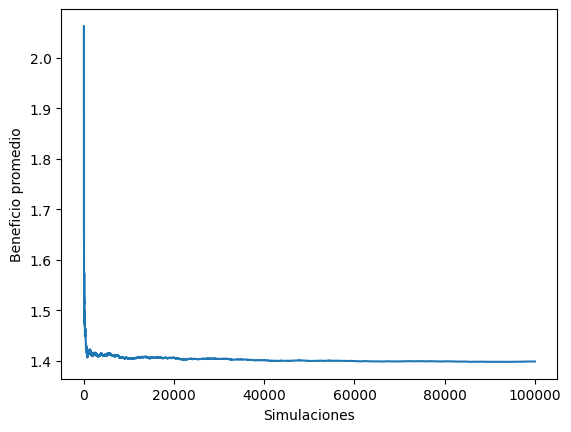

In [42]:
import matplotlib.pyplot as plt

plt.plot(range(1, n+1), medias_acumuladas)
plt.xlabel('Simulaciones')
plt.ylabel('Beneficio promedio')
plt

y asi, como resultado obtenemos que el beneficio diario del quiosquero durante ese mismo año, es de aproximadamente $1.3982$ $€$ $\eqsim$ $1.40$ $€$.

si deseamos calcular el beneficio esperado del quiosquero durante todo este año, unicamente basta con multiplicar por 365 dias, o bien por los dias que correspondan al ciclo de tiempo planteado en nuestra simulacion.

$B = 1.3982 \times 365 = 510.343$ $€$ $\eqsim$ $511$ $€$.

#### Paso 7. Hallamos el intervalo de confianza.

El intervalo de confianza depende de la distribución de probabilidad de la variable aleatoria que se está analizando. Een este caso, se está analizando el beneficio diario promedio de un año, que está determinado por una distribución de probabilidad que es el resultado de una simulación de Monte Carlo.

Para calcular el intervalo de confianza para una distribución normal, que es una de las distribuciones más comunes, se utiliza la siguiente fórmula:

$$IC =  \bar{x} \pm z_{\alpha/2} \cdot \frac{s}{\sqrt{n}}$$

Donde $\bar{x}$ es la media muestral

$z_{\alpha/2}$ es el valor crítico de la distribución normal estándar correspondiente al nivel de confianza deseado (por ejemplo, $z_{0.025} = 1.96$ para un nivel de confianza del 95%)

$s$ es la desviación estándar muestral

$n$ es el tamaño de la muestra.

Asi, nos apoyamos de lo siguiente para obtener nuestro intervalo de confianza.

El beneficio diario promedio es: 1.400589041095891
La desviacion estandar es: 0.4686075785515253


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

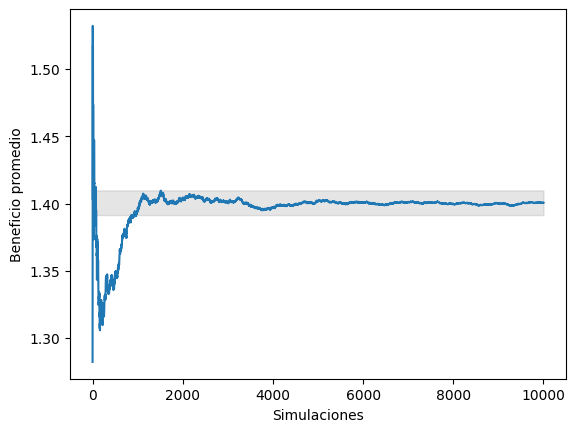

In [52]:
import matplotlib.pyplot as plt
import numpy as np

n=10000
resultados, medias_acumuladas = Repetir_experimento(n)
# Calculamos la media de los resultados y la imprimimos en pantalla
media = sum(resultados) / len(resultados)
print("El beneficio diario promedio es:", media)

desviacion_estandar = np.std(resultados)
print("La desviacion estandar es:",desviacion_estandar)

limite_inferior = media - 1.96 * (desviacion_estandar / np.sqrt(len(resultados)))
limite_superior = media + 1.96 * (desviacion_estandar / np.sqrt(len(resultados)))


plt.plot(range(1, n+1), medias_acumuladas)
plt.fill_between(range(1, n+1), limite_inferior, limite_superior, color='gray', alpha=.2)
plt.xlabel('Simulaciones')
plt.ylabel('Beneficio promedio')
plt

In [51]:
print("Nuestro intervalo de confianza esta dado por: (",limite_inferior,",",limite_superior,")")

Nuestro intervalo de confianza esta dado por: ( 1.3632634501855077 , 1.4194433991295627 )


### c) Determine, por simulación, el pedido de periódicos que optimiza el beneficio

Para este inciso, nos alejaremos un tanto del planteamiento del problema, ya que nos olvidaremos de las probabilidades de ocurrencia para la venta de periodicos.

La función: **grid_search(func,params)** implementa una búsqueda en malla, que es una técnica de optimización que consiste en evaluar sistemáticamente todas las combinaciones posibles de valores de los parámetros de entrada de una función, con el fin de encontrar los valores que maximizan (o minimizan) la función objetivo.

La función **grid_search(func,params)** toma como argumentos la función objetivo func y un diccionario params que especifica los valores posibles de cada parámetro que se quiere optimizar, en este caso se toma una lista de 1 a 100, el cual se define como sigue: **params = {'pedido': list(range(1, 101))}**, sin embargo, si queremos seguir la esctructura de nuestro problema inicial podemos mandar unicamente los parametros que se nos dan inicialmente como sigue: **params = {'pedido': [30,40,50,60,70]}**, sin embargo, para tener un margen mas exacto de maximizacion emplearemos el rango planteado inicialmente.

**max_result y max_params** son inicializados en None al inicio de la función. Estas variables serán actualizadas a medida que se va evaluando cada combinación de parámetros. Cuando se inicializa una variable en None, significa que no se le está asignando ningún valor en particular en ese momento, sino que se está reservando su espacio en memoria para asignarle un valor más adelante.


El ciclo for itera sobre todas las combinaciones de valores posibles de los parámetros especificados en params. Para generar todas las combinaciones, se utiliza la función itertools.product, que toma como argumentos los valores posibles de cada parámetro y devuelve un iterador que genera todas las combinaciones posibles.
En cada iteración del ciclo, se crea un diccionario param_dict que asigna los valores actuales de los parámetros a sus respectivas claves en el diccionario params.
Luego, se evalúa la función objetivo func con los parámetros especificados en param_dict. El resultado se almacena en la variable result.

Si max_result es None o result es mayor que max_result, se actualiza max_result y max_params con los valores actuales de result y param_dict, respectivamente.
Finalmente, la función retorna los parámetros que maximizan la función objetivo (max_params) y el valor máximo de la función objetivo (max_result).

In [ ]:
import numpy as np
import itertools

def grid_search(func, params):
    max_result = None
    max_params = None
    for param_values in itertools.product(*params.values()):
        param_dict = dict(zip(params.keys(), param_values))
        result = func(**param_dict)
        if max_result is None or result > max_result:
            max_result = result
            max_params = param_dict
    return max_params, max_result

La funcion **calcular_beneficio_diario_2(pedido)**, es una función similar, a la funcion que se declaro en el inciso a) llamada **calcular_beneficio_diario(pedido,Dias_a_simular,Imprimir)**

Solo que en esta ocasion, se ha limitado a tener el atributo de pedido, ya que es el dato que se desea maximizar.

In [ ]:
def calcular_beneficio_diario_2(pedido):
    Beneficios_diarios = []
    ventas_reales = 0
    ventas_perdidas = 0
    periodicos_no_vendidos = 0
    
    ## El valor 366, hace referencia al año considerado, es decir, esta simulando 365 dias para 
    ##  tener un mejor margen de simulacion y veracidad.
    for i in range(1, 365):
        [num_ventas,aleatorio] = num_periodicos_vendidos()
        if num_ventas > pedido:
            ventas_reales = pedido
            ventas_perdidas = num_ventas - pedido
            periodicos_no_vendidos = 0
        else:
            ventas_reales = num_ventas
            ventas_perdidas = 0
            periodicos_no_vendidos = pedido - num_ventas
        
        beneficio_diario = ventas_reales * 1.10 - pedido*0.90 - ventas_perdidas * 0.20 - periodicos_no_vendidos * 0.10
        Beneficios_diarios.append(beneficio_diario)
    beneficio_promedio = np.mean(Beneficios_diarios)
    return beneficio_promedio

Finalmente, calculamos el pedido de periódicos que optimiza el beneficio

In [ ]:
parametros_iniciales = {'pedido': list(range(1, 101))}
max_params, max_result = grid_search(calcular_beneficio_diario_2, parametros_iniciales)

print("El pedido de periódicos que optimiza el beneficio es:", max_params['pedido'])
print("El beneficio promedio diario máximo es:", max_result)

El pedido de periódicos que optimiza el beneficio es: 40
El beneficio promedio diario máximo es: 3.681318681318681


Y se obtiene que el numero de periodicos que optimiza el beneficio es de 40 periodicos, si el codigo se corre en mayor cantidad de veces, podemos notar que siempre esta en $\pm 2$ periodicos, sin embargo recordemos que nuestro problema inicial nos da como punto de partida unicamente los siguientes valores:  **params = {'pedido': [30,40,50,60,70]}**, por ende, tomaremos que son 40 periodicos, los que Maximizan de manera optima nuestro beneficio.

Por lo que no es necesario ejecutar una cantidad $n$, de veces esta simulación, ya que si lo corremos de manera manual un par de veces, se nota y es suficiente, pues siempre tenemos el mismo valor o agluno demasiado cercano.